<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/NIDS1_CICIDS_Visualization_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

Attribute selected

In [9]:
col_names = ['destination_port',
 'flow_duration',
 'total_fwd_packets',
 'total_backward_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_max',
 'fwd_packet_length_min',
 'fwd_packet_length_mean',
 'fwd_packet_length_std',
 'bwd_packet_length_max',
 'bwd_packet_length_min',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'flow_bytes/s',
 'flow_packets/s',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'fwd_iat_total',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_total',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'fwd_psh_flags',
 'bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'fwd_header_length',
 'bwd_header_length',
 'fwd_packets/s',
 'bwd_packets/s',
 'min_packet_length',
 'max_packet_length',
 'packet_length_mean',
 'packet_length_std',
 'packet_length_variance',
 'fin_flag_count',
 'syn_flag_count',
 'rst_flag_count',
 'psh_flag_count',
 'ack_flag_count',
 'urg_flag_count',
 'cwe_flag_count',
 'ece_flag_count',
 'down/up_ratio',
 'average_packet_size',
 'avg_fwd_segment_size',
 'avg_bwd_segment_size',
 'fwd_header_length.1',
 'fwd_avg_bytes/bulk',
 'fwd_avg_packets/bulk',
 'fwd_avg_bulk_rate',
 'bwd_avg_bytes/bulk',
 'bwd_avg_packets/bulk',
 'bwd_avg_bulk_rate',
 'subflow_fwd_packets',
 'subflow_fwd_bytes',
 'subflow_bwd_packets',
 'subflow_bwd_bytes',
 'init_win_bytes_forward',
 'init_win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward',
 'active_mean',
 'active_std',
 'active_max',
 'active_min',
 'idle_mean',
 'idle_std',
 'idle_max',
 'idle_min',
 'label',
 'day_of_week',
 'time_of_day'
 ]

len(col_names)

81

In [10]:
# # Load Classification Dataset

# df1 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# df2=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# df3=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
# df4=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
# df5=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
# df6=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
# df7=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
# df8=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


# df = pd.concat([df1,df2])
# del df1,df2
# df = pd.concat([df,df3])
# del df3
# df = pd.concat([df,df4])
# del df4
# df = pd.concat([df,df5])
# del df5
# df = pd.concat([df,df6])
# del df6
# df = pd.concat([df,df7])
# del df7
# df = pd.concat([df,df8])
# del df8

In [11]:
import os
import pandas as pd

# Define the file paths for each day of the week
file_paths = {
    'Monday': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday1': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday2': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday1': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday2': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday3': '/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
}

# Define the dictionaries to map the day of the week and time of day
day_map = {
    'Monday': ('Monday', 'Unknown'),
    'Tuesday': ('Tuesday', 'Unknown'),
    'Wednesday': ('Wednesday', 'Unknown'),
    'Thursday1': ('Thursday', 'Morning'),
    'Thursday2': ('Thursday', 'Afternoon'),
    'Friday1': ('Friday', 'Morning'),
    'Friday2': ('Friday', 'Afternoon'),
    'Friday3': ('Friday', 'Afternoon')
}

time_map = {
    'Morning': 'Morning',
    'Afternoon': 'Afternoon',
    'Evening': 'Evening',
    'Night': 'Night'
}

# Create an empty dataframe to store the combined data
df_final = pd.DataFrame()

# Loop through each day of the week and add the data to the combined dataframe
for day, file_path in file_paths.items():
    # Load the data from the file
    temp_df = pd.read_csv(file_path)
    
    # Add the day of the week and time of day columns
    temp_df['Day of Week'] = day_map[day][0]
    temp_df['Time of Day'] = day_map[day][1]

    print()
    
    # Append the data to the combined dataframe
    df_final = df_final.append(temp_df, ignore_index=True)

# Save the combined dataframe to a CSV file
df_final.to_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/combined_data.csv', index=False)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


<ipython-input-11-a10e4cafb950>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(temp_df, ignore_index=True)


In [12]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/CICIDS2017/MachineLearningCSV/MachineLearningCVE/combined_data.csv')

# data = df_final.copy()
# data.columns = col_names
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Day of Week,Time of Day
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,Monday,Unknown
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,Monday,Unknown
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,Monday,Unknown
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,Monday,Unknown
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,Monday,Unknown


In [13]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

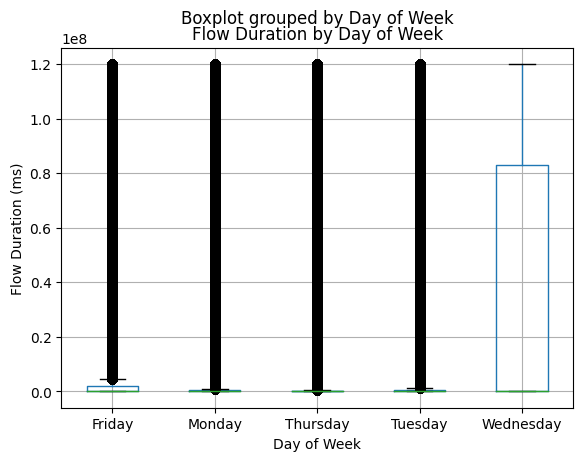

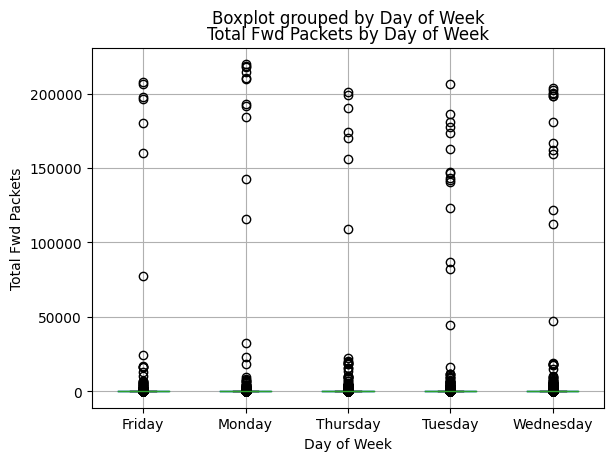

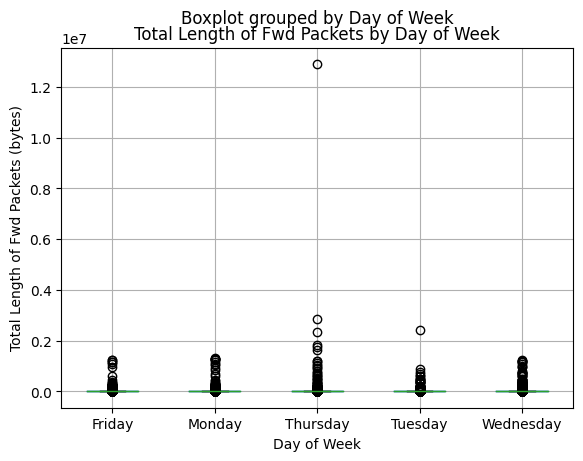

In [14]:
# Create a box plot for each feature, grouped by day of the week
data.boxplot(column=[' Flow Duration'], by='Day of Week')
plt.title('Flow Duration by Day of Week')
plt.ylabel('Flow Duration (ms)')
plt.xlabel('Day of Week')
plt.show()

data.boxplot(column=[' Total Fwd Packets'], by='Day of Week')
plt.title('Total Fwd Packets by Day of Week')
plt.ylabel('Total Fwd Packets')
plt.xlabel('Day of Week')
plt.show()

data.boxplot(column=['Total Length of Fwd Packets'], by='Day of Week')
plt.title('Total Length of Fwd Packets by Day of Week')
plt.ylabel('Total Length of Fwd Packets (bytes)')
plt.xlabel('Day of Week')
plt.show()

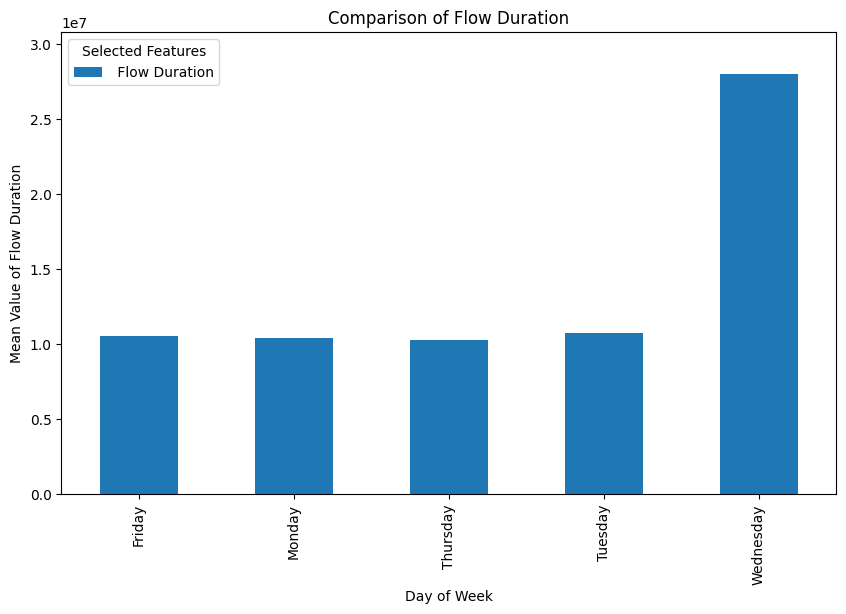

In [22]:
# Select the features to compare
features = [' Flow Duration']

# Group the data by day of the week and calculate the mean of selected features
grouped_df = data.groupby('Day of Week')[features].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10,6))
grouped_df.plot(kind='bar', ax=ax)
plt.title('Comparison of Flow Duration')
plt.xlabel('Day of Week')
plt.ylabel('Mean Value of Flow Duration')
plt.legend(title='Selected Features')

# Set y-axis range
ax.set_ylim(0, grouped_df.values.max()*1.1)

plt.show()

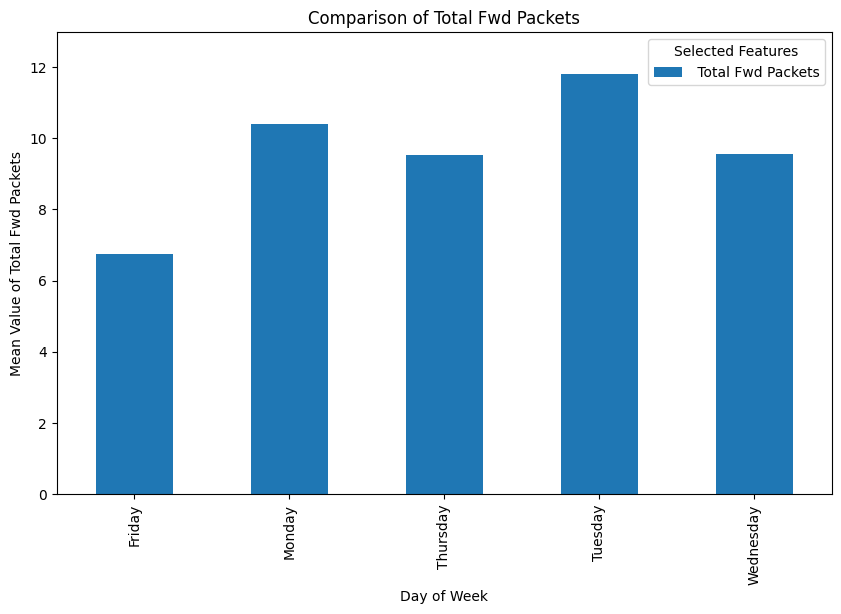

In [23]:
# Select the features to compare
features = [' Total Fwd Packets']

# Group the data by day of the week and calculate the mean of selected features
grouped_df = data.groupby('Day of Week')[features].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10,6))
grouped_df.plot(kind='bar', ax=ax)
plt.title('Comparison of Total Fwd Packets')
plt.xlabel('Day of Week')
plt.ylabel('Mean Value of Total Fwd Packets')
plt.legend(title='Selected Features')

# Set y-axis range
ax.set_ylim(0, grouped_df.values.max()*1.1)

plt.show()

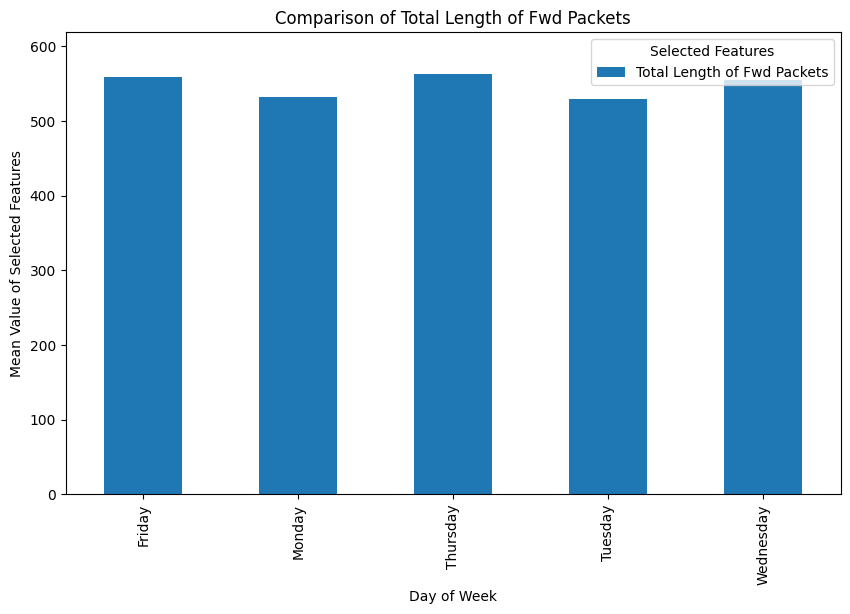

In [21]:
# Select the features to compare
features = ['Total Length of Fwd Packets']

# Group the data by day of the week and calculate the mean of selected features
grouped_df = data.groupby('Day of Week')[features].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10,6))
grouped_df.plot(kind='bar', ax=ax)
plt.title('Comparison of Total Length of Fwd Packets')
plt.xlabel('Day of Week')
plt.ylabel('Mean Value of Selected Features')
plt.legend(title='Selected Features')

# Set y-axis range
ax.set_ylim(0, grouped_df.values.max()*1.1)

plt.show()

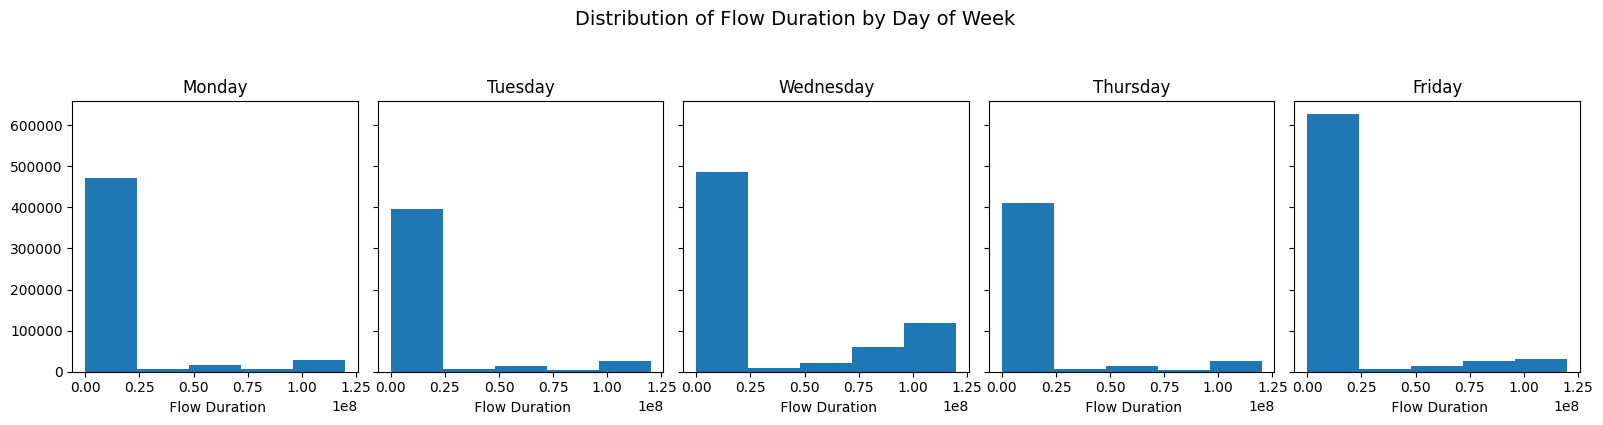

In [35]:
# Select the feature to compare
feature = ' Flow Duration'

# Create a histogram for each day of the week
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']):
    axs[i].hist(data[data['Day of Week'] == day][feature], bins=5)
    axs[i].set_title(day)
    axs[i].set_xlabel(feature)
    
plt.suptitle('Distribution of Flow Duration by Day of Week', fontsize=14, y=1.05)
plt.tight_layout()

plt.show()

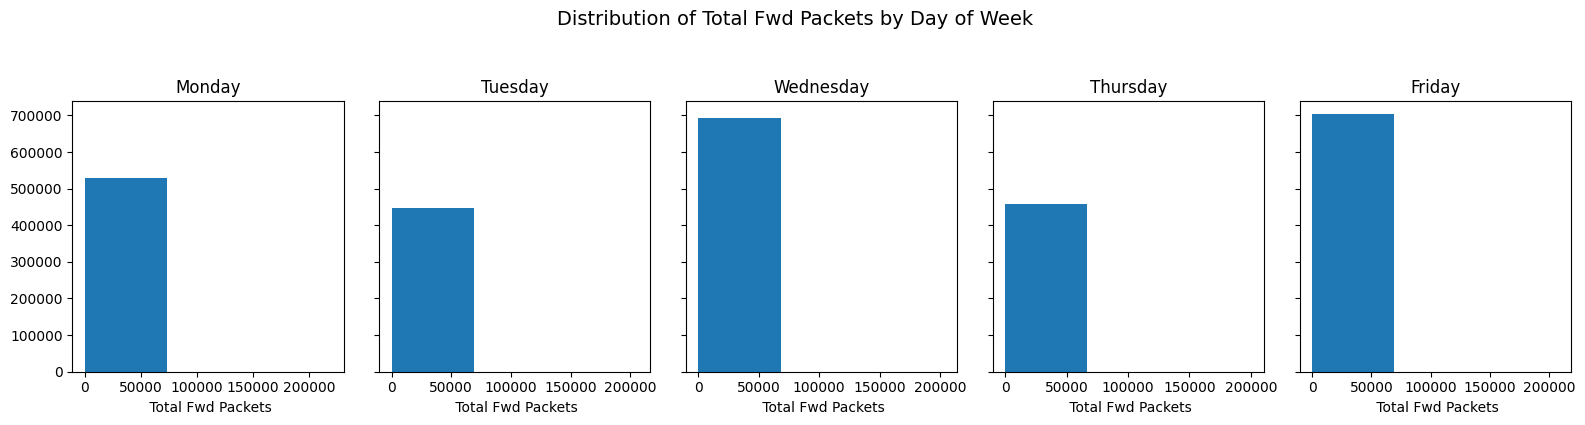

In [27]:
# Select the feature to compare
feature = ' Total Fwd Packets'

# Create a histogram for each day of the week
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']):
    axs[i].hist(data[data['Day of Week'] == day][feature], bins=3)
    axs[i].set_title(day)
    axs[i].set_xlabel(feature)
    
plt.suptitle('Distribution of Total Fwd Packets by Day of Week', fontsize=14, y=1.05)
plt.tight_layout()

plt.show()

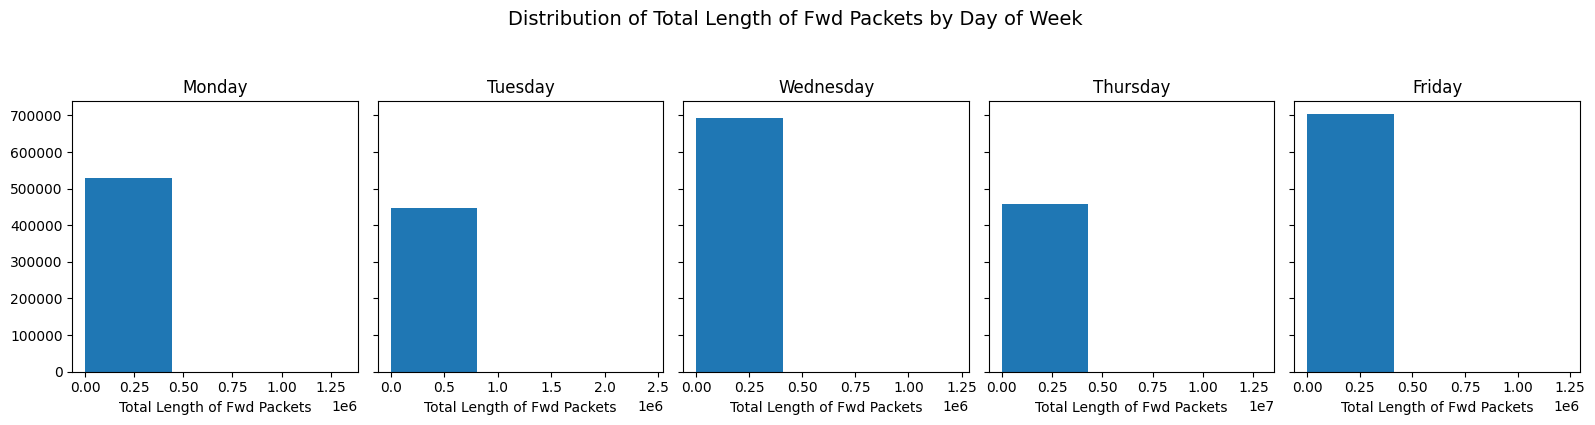

In [30]:
# Select the feature to compare
feature = 'Total Length of Fwd Packets'

# Create a histogram for each day of the week
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']):
    axs[i].hist(data[data['Day of Week'] == day][feature], bins=3)
    axs[i].set_title(day)
    axs[i].set_xlabel(feature)
    
plt.suptitle('Distribution of Total Length of Fwd Packets by Day of Week', fontsize=14, y=1.05)
plt.tight_layout()

plt.show()

In [ ]:
plot = 0 # make it 1 if want plot columnwise statistics
data.info()

In [ ]:
data.describe()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


# missing value checks

In [ ]:
# replacing infinity values with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.isnull().values.any()

True

In [ ]:
if data.isnull().values.any():
  missing_values_per_col = data.isnull().sum()
  print(type(missing_values_per_col))
  for i, ele in enumerate(missing_values_per_col):
    if ele > 0:
      print("column:",data.columns[i], "has ",ele, " missing values")
      dtype = type(data.iloc[0,i])
      print("dtype of column :", dtype)
      if dtype is np.float64 or dtype is np.int32 or dtype is np.int64:
        # filling a missing value with
        # previous ones  
        data.fillna(method ='pad', inplace=True)
      else:
        raise Exception("dtype of column is not numerical, please handle the missing data accordingly")
data.isnull().values.any()

<class 'pandas.core.series.Series'>
column: flow_bytes/s has  2867  missing values
dtype of column : <class 'numpy.float64'>
column: flow_packets/s has  2867  missing values
dtype of column : <class 'numpy.float64'>


False

In [ ]:
data.label.value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [ ]:
data.shape

(2830743, 79)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print(nRow, nCol )
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
if plot == 1:
  plotPerColumnDistribution(data, 79, 5)

In [ ]:
# changing different labels to their respective broad class
# I will convert other abnormal classes to one class

data["binary_label"]=data.label.map(lambda a: "normal" if a == 'BENIGN' else "abnormal")
data.drop('label',axis=1,inplace=True)

In [ ]:
# distribution of attack classes
data.binary_label.value_counts()

normal      2273097
abnormal     557646
Name: binary_label, dtype: int64

In [ ]:
data.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal


In [ ]:
# saving unprocessed dataset to disk
data_unprocessed = data

# data_unprocessed.to_csv("/content/drive/MyDrive/Colab_Notebooks/nids_project_data/cicids2017_data/bin_data_unprocessed.csv")
# import os
# os.getcwd()

**Data Normalization(to be done after data spliting) and Encoding(to be done now)**

In [ ]:
# numeric feature normalization
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(['number']).columns
# flag = 0
# scaler = None
# if flag:
#   # using standard scaler for normalizing
#   scaler = StandardScaler()
# else:
#   # using minmax scaler for normalizing
#   # to avoid negative values after scaling
#   scaler = MinMaxScaler()

# def normalization(df,col):
#   for i in col:
#     arr = df[i]
#     arr = np.array(arr)
#     df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
#   return df

In [ ]:
len(numeric_cols)

78

In [ ]:
# calling the normalization() function
# data_num = normalization(data,numeric_cols)
data_num = data
data_num.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal


In [ ]:
# check for categorical colummns in a pandas dataframe
cat_cols = data.select_dtypes(['object']).columns
print(cat_cols)
if len(cat_cols) > 1:
  cat_cols_without_label = ['protocol_type', 'service', 'flag'] # enter cat cols names accordingly 
  data_categorical = pd.get_dummies(data[cat_cols_without_label],columns=cat_cols_without_label) 
  data_categorical.head()

Index(['binary_label'], dtype='object')


In [ ]:
data_processed = data_num
if len(cat_cols) > 1:
  data_processed = data_processed.drop(cat_cols_without_label, axis = 1)
  data_processed = data_categorical.join(data_processed)
data_processed

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,normal
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,normal


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_processed['binary_label'] = le.fit_transform(data_processed['binary_label'])
# data_processed['binary_label'].value_counts()
data_processed.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
# sampling data taking only 20% of the data
data_processed_sample = data_processed.groupby('binary_label', group_keys=False).apply(lambda x: x.sample(frac=0.2))
data_processed_sample

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
162502,80,3751908,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
134703,80,83406801,5,7,303,11595,291,0,60.600000,128.832449,...,20,7022.0,0.0,7022,7022,83200000.0,0.0,83200000,83200000,0
249277,80,2,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
159823,80,97900308,8,5,56,11607,20,0,7.000000,5.656854,...,20,4142902.0,0.0,4142902,4142902,93100000.0,0.0,93100000,93100000,0
203075,22,10914142,21,32,2008,2745,640,0,95.619048,140.045163,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53291,49362,209,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
73884,53,582,1,1,54,119,54,54,54.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
112704,53,50488,1,1,54,82,54,54,54.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
15494,53,90851,4,2,140,254,35,35,35.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
# saving final dataset to disk
data_processed_sample.to_csv("/content/drive/MyDrive/Colab_Notebooks/nids_project_data/cicids2017_data/bin_data_processed.csv")
# final dataset for binary classification
data_processed_sample

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,binary_label
162502,80,3751908,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
134703,80,83406801,5,7,303,11595,291,0,60.600000,128.832449,...,20,7022.0,0.0,7022,7022,83200000.0,0.0,83200000,83200000,0
249277,80,2,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
159823,80,97900308,8,5,56,11607,20,0,7.000000,5.656854,...,20,4142902.0,0.0,4142902,4142902,93100000.0,0.0,93100000,93100000,0
203075,22,10914142,21,32,2008,2745,640,0,95.619048,140.045163,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53291,49362,209,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
73884,53,582,1,1,54,119,54,54,54.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
112704,53,50488,1,1,54,82,54,54,54.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
15494,53,90851,4,2,140,254,35,35,35.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = data_processed_sample[numeric_cols]
# numeric_bin
numeric_bin['binary_label'] = data_processed_sample['binary_label']

In [ ]:
corr= numeric_bin.corr()
corr_y = abs(corr['binary_label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

min_packet_length         0.314461
flow_iat_std              0.335396
idle_min                  0.379254
flow_iat_max              0.387159
fwd_iat_max               0.387182
idle_mean                 0.389017
idle_max                  0.392712
average_packet_size       0.414406
packet_length_mean        0.415213
fwd_iat_std               0.421894
max_packet_length         0.454224
packet_length_variance    0.454276
packet_length_std         0.470851
avg_bwd_segment_size      0.484125
bwd_packet_length_mean    0.484125
bwd_packet_length_max     0.492015
bwd_packet_length_std     0.510396
binary_label              1.000000
Name: binary_label, dtype: float64